In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
all_files = glob.glob(r"./furtos/*")
df = pd.concat((pd.read_csv(f, sep='\t', encoding='UTF-16 LE') for f in all_files), ignore_index=True)

In [64]:
df.to_csv("furtos_consolidado.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27258 entries, 0 to 27257
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO_BO                    27258 non-null  int64  
 1   NUM_BO                    27258 non-null  int64  
 2   NUMERO_BOLETIM            27258 non-null  object 
 3   BO_INICIADO               27258 non-null  object 
 4   BO_EMITIDO                27258 non-null  object 
 5   DATAOCORRENCIA            27258 non-null  object 
 6   HORAOCORRENCIA            21584 non-null  object 
 7   PERIDOOCORRENCIA          27258 non-null  object 
 8   DATACOMUNICACAO           27258 non-null  object 
 9   DATAELABORACAO            27258 non-null  object 
 10  BO_AUTORIA                27258 non-null  object 
 11  FLAGRANTE                 27258 non-null  object 
 12  NUMERO_BOLETIM_PRINCIPAL  2077 non-null   object 
 13  LOGRADOURO                24531 non-null  object 
 14  NUMERO

In [5]:
df["SOLUCAO"].unique()

array(['BO PARA INVESTIGAÇÃO', 'ENCAMINHAMENTO DP ÁREA DO FATO',
       'BO PARA ADENDO', 'APRECIAÇÃO DO DELEGADO TITULAR',
       'BO PARA FLAGRANTE', 'ENCAMINHAMENTO JECRIM',
       'ENCAM FEBEM/V.INFAN.JUVENTUDE', 'BO PARA REGISTRO',
       'BO PARA INQUÉRITO', 'AG. REPRESENTAÇÃO/REQUERIMENTO',
       'AGUARDANDO LAUDOS'], dtype=object)

<AxesSubplot:xlabel='SOLUCAO'>

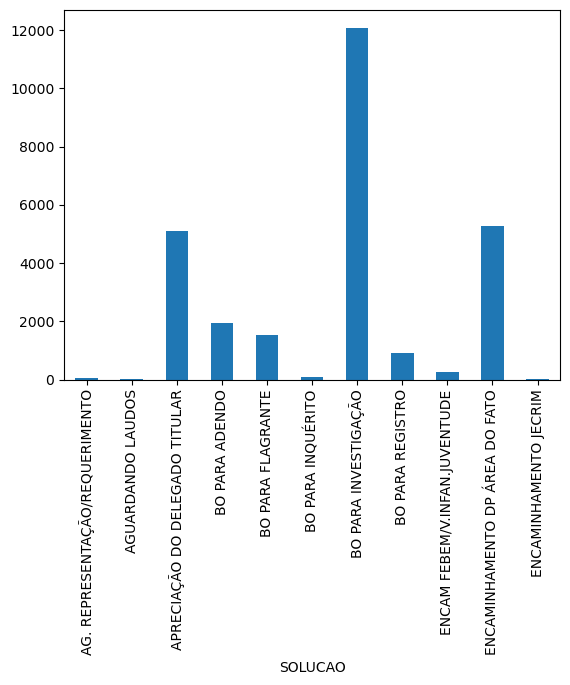

In [6]:
df.groupby("SOLUCAO").size().plot(kind="bar")

In [7]:
crimes = df[["DATAOCORRENCIA", "HORAOCORRENCIA", "LATITUDE", "LONGITUDE", "UF", "CIDADE", "BAIRRO", "LOGRADOURO", "NUMERO", "DESCRICAOLOCAL"]]

In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27258 entries, 0 to 27257
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATAOCORRENCIA  27258 non-null  object 
 1   HORAOCORRENCIA  21584 non-null  object 
 2   LATITUDE        23533 non-null  object 
 3   LONGITUDE       23533 non-null  object 
 4   UF              27228 non-null  object 
 5   CIDADE          27228 non-null  object 
 6   BAIRRO          27191 non-null  object 
 7   LOGRADOURO      24531 non-null  object 
 8   NUMERO          27228 non-null  float64
 9   DESCRICAOLOCAL  27258 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [9]:
crimes.head()

,DATAOCORRENCIA,HORAOCORRENCIA,LATITUDE,LONGITUDE,UF,CIDADE,BAIRRO,LOGRADOURO,NUMERO,DESCRICAOLOCAL
0,31/12/2019,19:40,"-23,7922565","-46,7346228",SP,S.PAULO,RECANTO CAMPO BELO,RUA CARLOS JORGE SCHMIDT,25.0,Via Pública
1,31/12/2019,20:00,NaN,NaN,SP,CAMPINAS,VILA POMPÉIA,NaN,0.0,Residência
2,31/12/2019,20:00,NaN,NaN,SP,CAMPINAS,VILA POMPÉIA,NaN,0.0,Residência
3,01/01/2020,00:10,"-22,57909026166","-47,4005166555599",SP,LIMEIRA,VILA CLAUDIA,AVENIDA ANTÔNIO OMETO,675.0,Via pública
4,01/01/2020,00:30,"-21,275784178","-50,332539504",SP,BIRIGUI,CHACARAS CAICARA,RUA BENJAMIN STROZI,793.0,Via pública


In [10]:
crimes["DATAHORA"] = pd.to_datetime(crimes["DATAOCORRENCIA"] + " " + crimes["HORAOCORRENCIA"])

In [11]:
categorical_cols = ["UF", "CIDADE", "BAIRRO", "LOGRADOURO", "DESCRICAOLOCAL"]

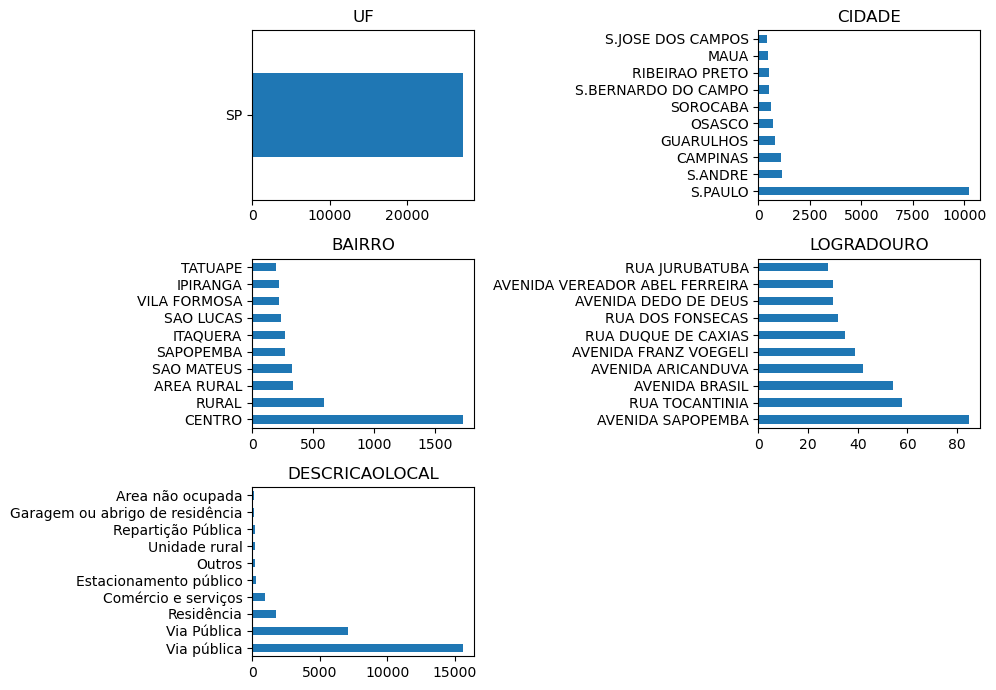

In [12]:
plt.figure(figsize=(10, 7))
for i, c in enumerate(categorical_cols):
  plt.subplot(3, 2, i+1)
  plt.title(c)
  crimes[c].value_counts().head(10).plot(kind="barh")
plt.tight_layout()

In [13]:
categorical_cols.remove("UF")

In [14]:
for c in categorical_cols:
  crimes.loc[:, c] = crimes[c].str.normalize("NFKD").str.encode("ascii",  errors='ignore').str.decode("UTF-8").str.lower()

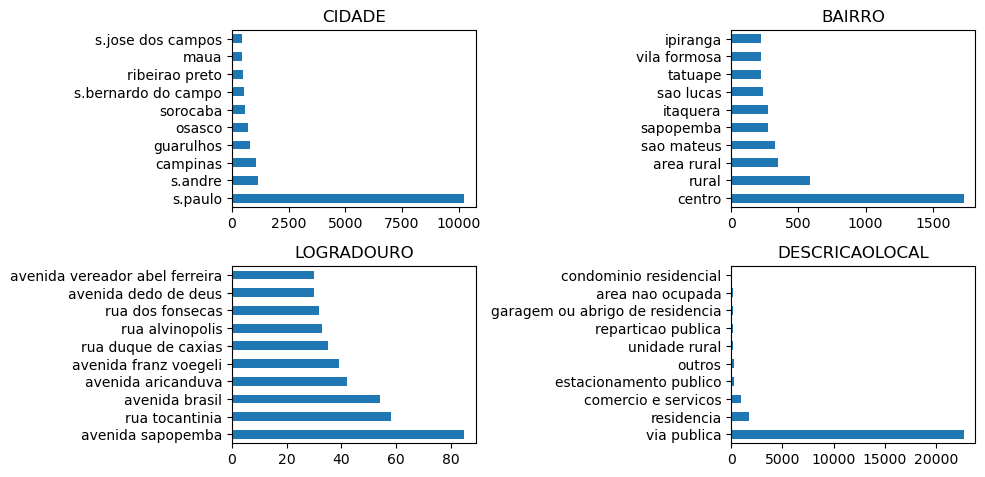

In [15]:
plt.figure(figsize=(10, 7))
for i, c in enumerate(categorical_cols):
  plt.subplot(3, 2, i+1)
  plt.title(c)
  crimes[c].value_counts().head(10).plot(kind="barh")
plt.tight_layout()

In [16]:
for c in categorical_cols:
  print(f"{c} : {crimes[c].nunique()}")

CIDADE : 423
BAIRRO : 3893
LOGRADOURO : 12422
DESCRICAOLOCAL : 32


In [17]:
crimes.drop(columns=["DATAOCORRENCIA", "HORAOCORRENCIA", "UF", "NUMERO"], inplace=True)

In [18]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27258 entries, 0 to 27257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   LATITUDE        23533 non-null  object        
 1   LONGITUDE       23533 non-null  object        
 2   CIDADE          27228 non-null  object        
 3   BAIRRO          27191 non-null  object        
 4   LOGRADOURO      24531 non-null  object        
 5   DESCRICAOLOCAL  27258 non-null  object        
 6   DATAHORA        21584 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.5+ MB


<AxesSubplot:>

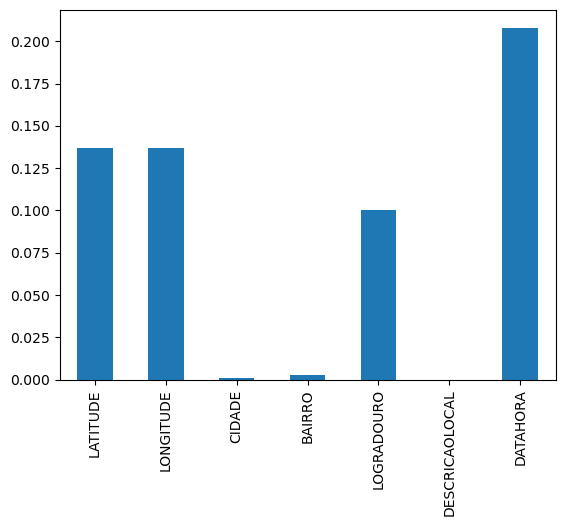

In [19]:
crimes.isnull().mean().plot(kind="bar")

In [20]:
crimes.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 0 to 27257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   LATITUDE        19030 non-null  object        
 1   LONGITUDE       19030 non-null  object        
 2   CIDADE          19030 non-null  object        
 3   BAIRRO          19030 non-null  object        
 4   LOGRADOURO      19030 non-null  object        
 5   DESCRICAOLOCAL  19030 non-null  object        
 6   DATAHORA        19030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ MB


In [21]:
crimes.dropna(inplace=True)

In [22]:
crimes = crimes[crimes["CIDADE"] != "s.paulo"]

In [23]:
crimes["DATA"] = crimes["DATAHORA"].dt.date
crimes["ANO"] = crimes["DATAHORA"].dt.year
crimes["MES"] = crimes["DATAHORA"].dt.month
crimes["DIA"] = crimes["DATAHORA"].dt.day
crimes["HORA"] = crimes["DATAHORA"].dt.hour
crimes["DIASEMANA"] = crimes["DATAHORA"].dt.weekday

In [24]:
to_score = ["CIDADE", "BAIRRO", "LOGRADOURO", "DATA", "HORA"]
for t in to_score:
  grouped = crimes.groupby(t).size().reset_index()
  grouped.rename(columns={0: f"{t}_PONTOS"}, inplace=True)
  crimes = crimes.join(grouped.set_index(t), on=t)

In [25]:
crimes.head()

,LATITUDE,LONGITUDE,CIDADE,BAIRRO,LOGRADOURO,DESCRICAOLOCAL,DATAHORA,DATA,ANO,MES,DIA,HORA,DIASEMANA,CIDADE_PONTOS,BAIRRO_PONTOS,LOGRADOURO_PONTOS,DATA_PONTOS,HORA_PONTOS
3,"-22,57909026166","-47,4005166555599",limeira,vila claudia,avenida antonio ometo,via publica,2020-01-01 00:10:00,2020-01-01,2020,1,1,0,2,163,15,3,79,291
4,"-21,275784178","-50,332539504",birigui,chacaras caicara,rua benjamin strozi,via publica,2020-01-01 00:30:00,2020-01-01,2020,1,1,0,2,75,2,1,79,291
5,"-21,2950785813076","-50,3460703965384",birigui,jardim vitrine,rua silvio vieira coelho,via publica,2020-01-01 00:30:00,2020-01-01,2020,1,1,0,2,75,1,1,79,291
6,"-23,4571393","-46,4229804",guarulhos,jardim santa maria,avenida jose miguel ackel,estacionamento particular,2019-12-31 19:00:00,2019-12-31,2019,12,31,19,1,570,7,3,51,664
7,"-22,6420548964736","-47,1982439506315",cosmopolis,bela vista iv,rua presidente getulio vargas,via publica,2019-12-31 19:40:00,2019-12-31,2019,12,31,19,1,12,4,6,51,664


In [26]:
scores = ["CIDADE_PONTOS", "BAIRRO_PONTOS", "LOGRADOURO_PONTOS", "DATA_PONTOS", "HORA_PONTOS"]
crimes["PONTOS"] = crimes[scores].sum(axis=1)

In [27]:
crimes.drop(columns=["DATAHORA", "LATITUDE", "LONGITUDE", "ANO", "DATA", *scores], inplace=True)

In [28]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 3 to 27253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CIDADE          10835 non-null  object
 1   BAIRRO          10835 non-null  object
 2   LOGRADOURO      10835 non-null  object
 3   DESCRICAOLOCAL  10835 non-null  object
 4   MES             10835 non-null  int64 
 5   DIA             10835 non-null  int64 
 6   HORA            10835 non-null  int64 
 7   DIASEMANA       10835 non-null  int64 
 8   PONTOS          10835 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 846.5+ KB


In [29]:
min = crimes["PONTOS"].min()
max = crimes["PONTOS"].max()
crimes["PONTOS"] = (crimes["PONTOS"] - min) / (max - min)

<AxesSubplot:>

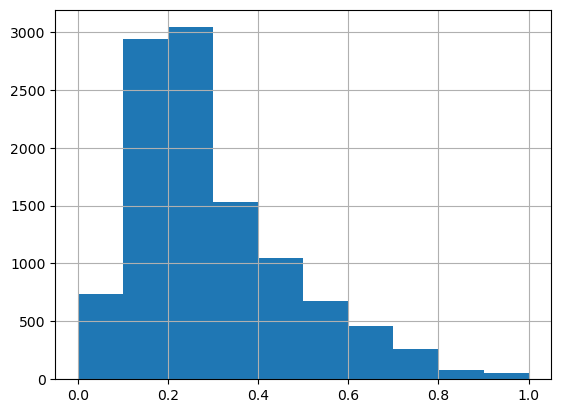

In [30]:
crimes["PONTOS"].hist()

In [31]:
crimes[crimes["PONTOS"] >= 0.8]

,CIDADE,BAIRRO,LOGRADOURO,DESCRICAOLOCAL,MES,DIA,HORA,DIASEMANA,PONTOS
783,s.andre,centro,rua senador flaquer,via publica,4,1,8,2,0.931151
996,osasco,centro,rua adolfo valentine,via publica,4,1,21,2,0.816780
1917,guarulhos,centro,rua sao vicente de paula,via publica,8,1,11,5,0.822423
2810,s.andre,centro,rua coronel agenor de camargo,via publica,7,14,14,6,0.881866
3463,osasco,centro,rua pedro fioreti,via publica,1,13,11,0,0.801354
...,...,...,...,...,...,...,...,...,...
23180,osasco,centro,rua avelino lopes,via publica,3,13,11,4,0.805869
24281,s.andre,centro,rua campos sales,via publica,3,16,16,0,0.918360
24332,campinas,centro,rua mal deodoro,via publica,3,17,13,1,0.844996
24926,s.andre,centro,rua onze de junho,via publica,3,19,12,3,0.944695


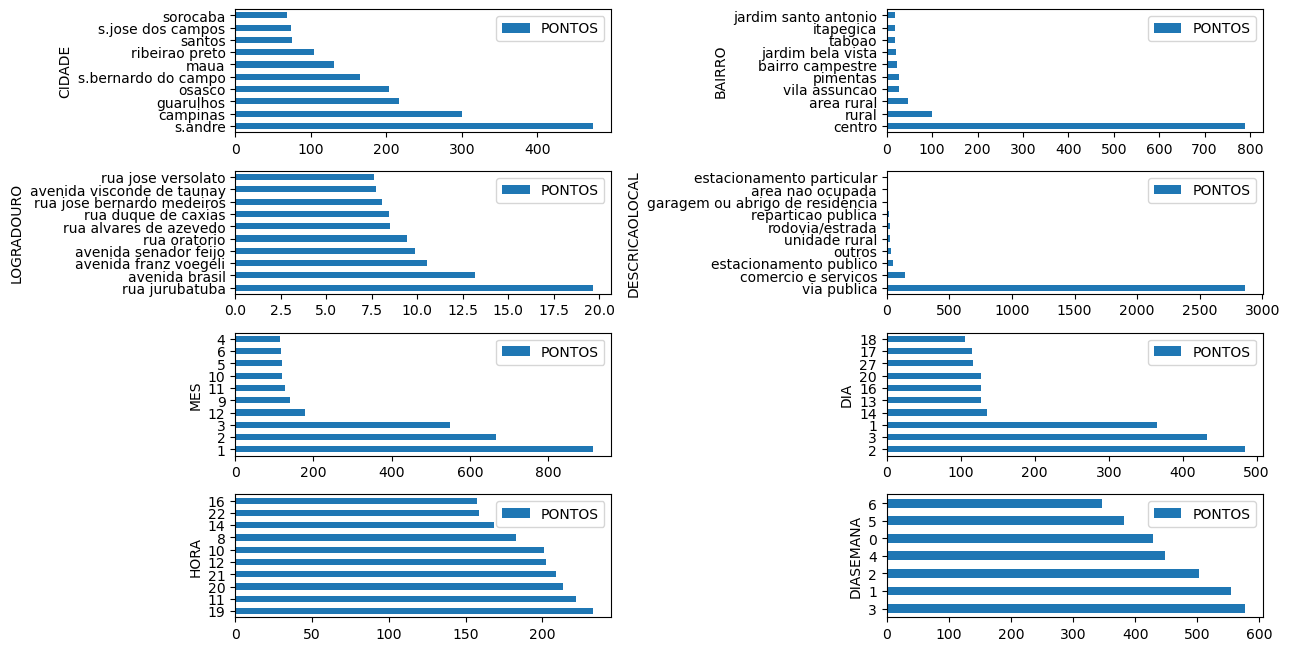

In [32]:
columns = crimes.columns.to_list()
columns.remove("PONTOS")
plt.figure(figsize=(13, 8))
for i, c in enumerate(columns):
  ax = plt.subplot(5, 2, i+1)
  crimes.groupby(c).agg({"PONTOS": "sum"}).sort_values(by="PONTOS", ascending=False).head(10).plot(kind="barh", ax=ax)
plt.tight_layout()

In [33]:
crimes = crimes.reindex(columns=[
    'CIDADE', 'BAIRRO', 'LOGRADOURO', 'DESCRICAOLOCAL', 'MES',
    'DIA', 'HORA', 'DIASEMANA', 'PONTOS'])

<AxesSubplot:xlabel='MES'>

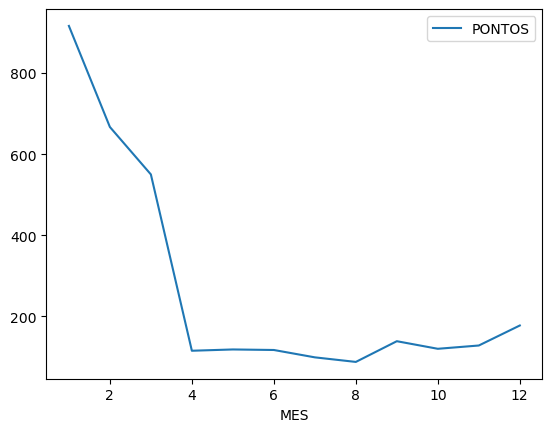

In [34]:
crimes.groupby("MES").agg({"PONTOS": "sum"}).plot()

In [35]:
crimes.shape

(10835, 9)

In [36]:
# sample = crimes.sample(n=5_000, random_state=42)

In [37]:
from sklearn.preprocessing import SplineTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [38]:
def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )

In [39]:
X, y = crimes.iloc[:, :-1].values, crimes.iloc[:, -1].values

In [40]:
one_hot_encoder = OneHotEncoder(drop="first")
preprocessing = ColumnTransformer(transformers=[
    ("categories", one_hot_encoder, [0, 1, 2, 3]),
    ("month", periodic_spline_transformer(12, 6), [4]),
    ("day", periodic_spline_transformer(365, 182), [5]),
    ("hour", periodic_spline_transformer(24, 12), [6]),
    ("weekday", periodic_spline_transformer(7, 3), [7])
], remainder="drop")

In [41]:
regressor = tree.DecisionTreeRegressor(
        #max_depth=3,
        random_state=42,
        #min_samples_leaf=100
      )

In [42]:
params = {'max_depth': np.arange(5, 20, 3), 'min_samples_leaf': [5, 10, 100]}
grid_search = GridSearchCV(
    regressor,
    params,
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    n_jobs=-1,
    cv=5,
    refit='r2',
    verbose=2
)

In [43]:
pipeline = make_pipeline(
    preprocessing,
    grid_search
)

In [44]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 1, 2, 3]),
                                                 ('month',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.]]),
                                                                    n_knots=7),
                                                  [4]),
                                                 ('day',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[  0.        ],
       [  2.00549451],
       [  4.01098901],
       [  6.01648352],
       [...
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[0.        ],
       [2.33333333],
       [4.66666667],
       [7.        ]]),
                                                                    n_knots=4),
                                                  [7])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': array([ 5,  8, 11, 14, 17]),
                                          'min_samples_leaf': [5, 10, 100]},
                              refit='r2',
                              scoring=['r2', 'neg_mean_squared_error',
                                       'neg_mean_absolute_error'],
                              verbose=2))])

In [45]:
pipeline.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 1, 2, 3]),
                                                 ('month',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.]]),
                                                                    n_knots=7),
                                                  [4]),
                                                 ('day',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[  0.        ],
       [  2.00549451],
       [  4.01098901],
       [  6.01648352],
       [...
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[0.        ],
       [2.33333333],
       [4.66666667],
       [7.        ]]),
                                                                    n_knots=4),
                                                  [7])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': array([ 5,  8, 11, 14, 17]),
                                          'min_samples_leaf': [5, 10, 100]},
                              refit='r2',
                              scoring=['r2', 'neg_mean_squared_error',
                                       'neg_mean_absolute_error'],
                              verbose=2))])

In [46]:
pipeline.score(X, y)

0.9838983913732188

In [47]:
results = pipeline['gridsearchcv'].cv_results_
results = pd.DataFrame(data=results)

In [48]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   mean_fit_time                        15 non-null     float64
 1   std_fit_time                         15 non-null     float64
 2   mean_score_time                      15 non-null     float64
 3   std_score_time                       15 non-null     float64
 4   param_max_depth                      15 non-null     object 
 5   param_min_samples_leaf               15 non-null     object 
 6   params                               15 non-null     object 
 7   split0_test_r2                       15 non-null     float64
 8   split1_test_r2                       15 non-null     float64
 9   split2_test_r2                       15 non-null     float64
 10  split3_test_r2                       15 non-null     float64
 11  split4_test_r2                    

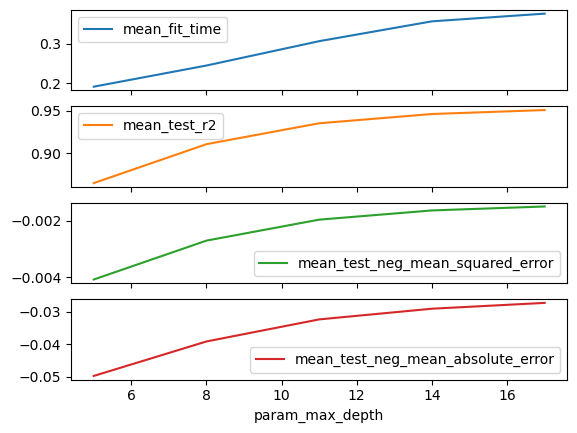

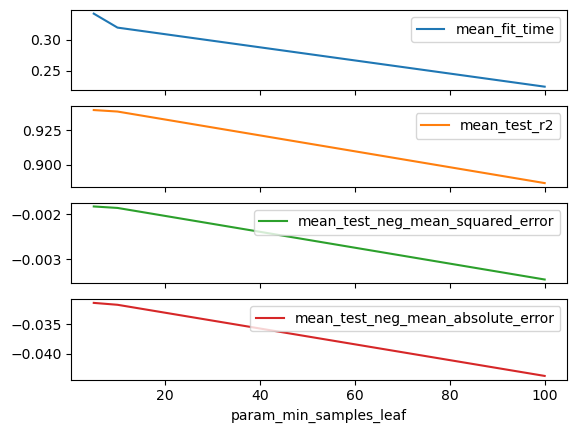

In [63]:
metrics = ["mean_fit_time", "mean_test_r2", "mean_test_neg_mean_squared_error", "mean_test_neg_mean_absolute_error"]
params = ["param_max_depth", "param_min_samples_leaf"]
for p in params:
  results.groupby(p)[metrics]\
    .agg("mean").plot(kind="line", subplots=True)

In [50]:
y_pred = pipeline.predict(X)

(array([ 737., 2942., 3040., 1535., 1048.,  679.,  463.,  260.,   80.,
          51.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

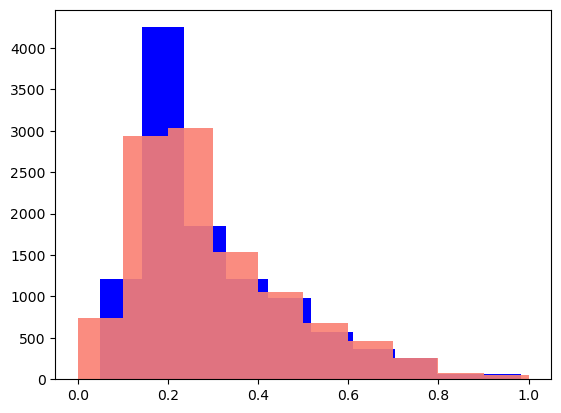

In [51]:
plt.hist(y_pred, color='b')
plt.hist(y, color='salmon', alpha=.9)

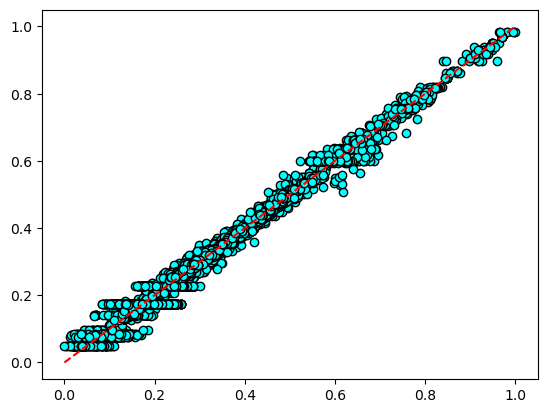

In [52]:
plt.plot([0, 1], 'r--')
plt.scatter(y, y_pred, color='cyan', edgecolors='black')

In [53]:
estimator = pipeline['gridsearchcv'].best_estimator_

[Text(0.8506154184885284, 0.9722222222222222, 'x[564] <= 0.5\nsquared_error = 0.031\nsamples = 10835\nvalue = 0.299'),
 Text(0.7214388943936975, 0.9166666666666666, 'x[263] <= 0.5\nsquared_error = 0.014\nsamples = 9645\nvalue = 0.254'),
 Text(0.5937839316667965, 0.8611111111111112, 'x[50] <= 0.5\nsquared_error = 0.009\nsamples = 8786\nvalue = 0.23'),
 Text(0.48513914722265505, 0.8055555555555556, 'x[8937] <= 0.01\nsquared_error = 0.007\nsamples = 8098\nvalue = 0.215'),
 Text(0.37655020547678403, 0.75, 'x[110] <= 0.5\nsquared_error = 0.006\nsamples = 6444\nvalue = 0.235'),
 Text(0.30187923613275164, 0.6944444444444444, 'x[201] <= 0.5\nsquared_error = 0.005\nsamples = 6019\nvalue = 0.225'),
 Text(0.23802927313804922, 0.6388888888888888, 'x[8945] <= 0.323\nsquared_error = 0.004\nsamples = 5674\nvalue = 0.218'),
 Text(0.17780558585229042, 0.5833333333333334, 'x[267] <= 0.5\nsquared_error = 0.004\nsamples = 4276\nvalue = 0.205'),
 Text(0.14510945777500778, 0.5277777777777778, 'x[178] <= 0.5

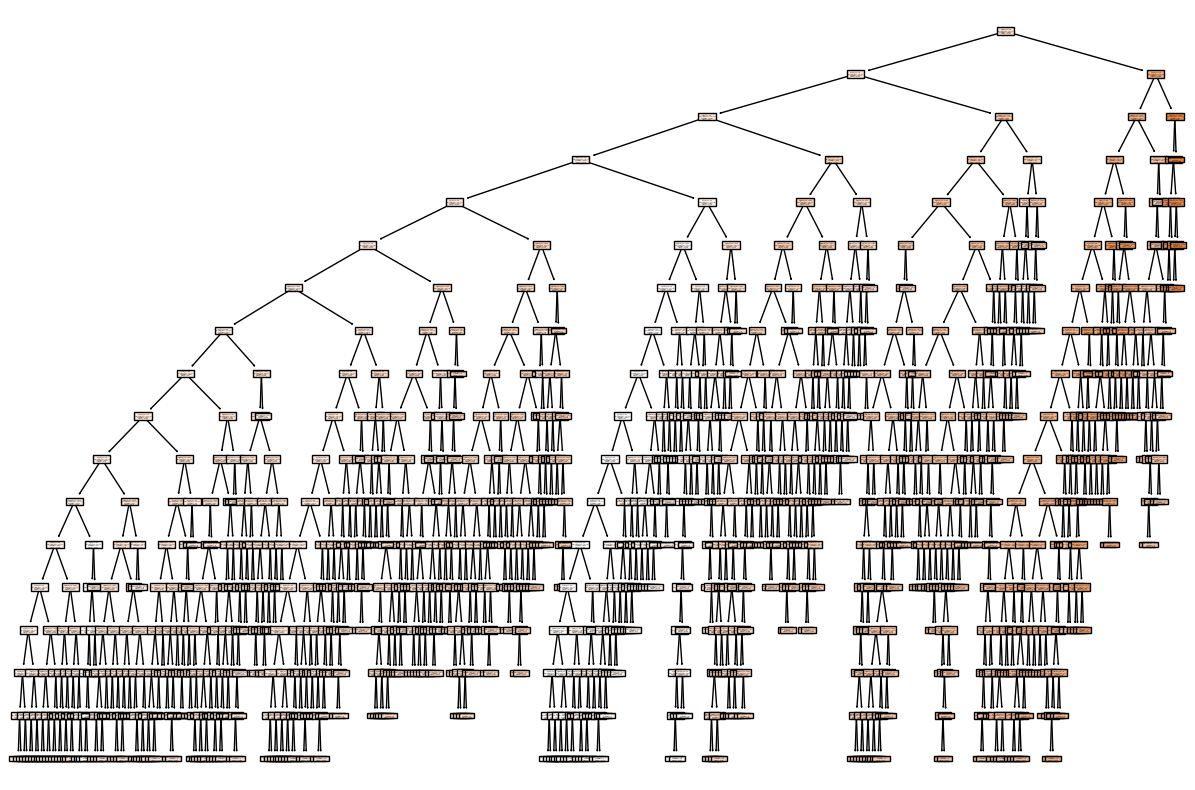

In [54]:
plt.figure(figsize=(15, 10))
tree.plot_tree(estimator, filled=True)

In [55]:
tunned_regressor = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=100)
pipeline = make_pipeline(preprocessing, tunned_regressor)

In [56]:
pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 1, 2, 3]),
                                                 ('month',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.]]),
                                                                    n_knots=7),
                                                  [4]),
                                                 ('day',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[  0.        ],
       [  2.00549451],
       [  4.01098901],
       [  6.01648352],
       [...
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.],
       [14.],
       [16.],
       [18.],
       [20.],
       [22.],
       [24.]]),
                                                                    n_knots=13),
                                                  [6]),
                                                 ('weekday',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[0.        ],
       [2.33333333],
       [4.66666667],
       [7.        ]]),
                                                                    n_knots=4),
                                                  [7])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=2, min_samples_leaf=100))])

In [57]:
pipeline.score(X, y)

0.7131378417396124

In [58]:
y_pred = pipeline.predict(X)

In [59]:
crimes["PREDICAO"] = y_pred

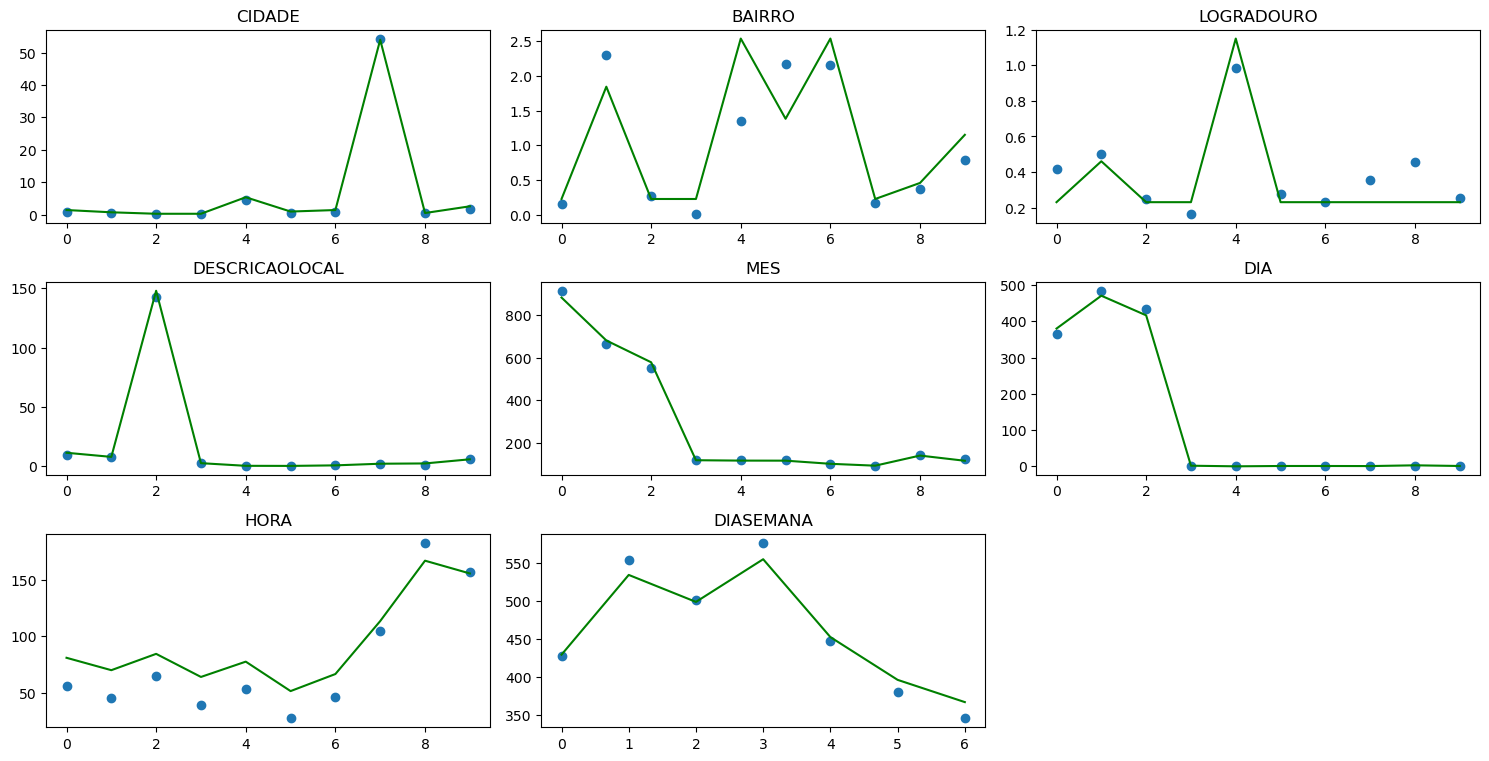

In [60]:
features = [ 'CIDADE', 'BAIRRO', 'LOGRADOURO', 'DESCRICAOLOCAL', 'MES',
    'DIA', 'HORA', 'DIASEMANA']
plt.figure(figsize=(15, 10))
for i, f in enumerate(features):
    plt.subplot(4, 3, i+1)
    values = crimes.groupby(f).agg({"PONTOS": "sum", "PREDICAO": "sum"}).head(10).reset_index().values
    x_labels = np.arange(0, values.shape[0])
    plt.title(f)
    plt.scatter(x_labels, values[:, 1])
    plt.plot(x_labels, values[:, 2], c='g')
plt.tight_layout()
plt.show()

[Text(0.5, 0.8333333333333334, 'x[564] <= 0.5\nsquared_error = 0.031\nsamples = 10835\nvalue = 0.299'),
 Text(0.25, 0.5, 'x[263] <= 0.5\nsquared_error = 0.014\nsamples = 9645\nvalue = 0.254'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.009\nsamples = 8786\nvalue = 0.23'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 859\nvalue = 0.495'),
 Text(0.75, 0.5, 'x[8937] <= 0.01\nsquared_error = 0.012\nsamples = 1190\nvalue = 0.663'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.01\nsamples = 1016\nvalue = 0.685'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.005\nsamples = 174\nvalue = 0.534')]

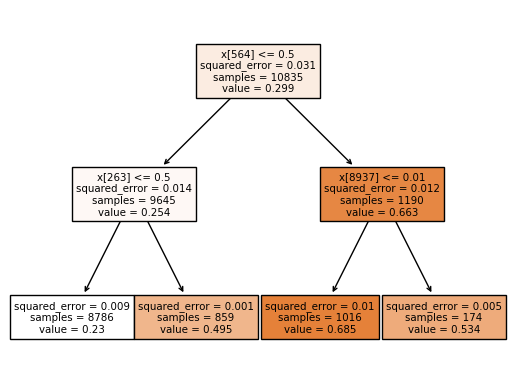

In [61]:
tree.plot_tree(pipeline['decisiontreeregressor'], filled=True)

(array([ 737., 2942., 3040., 1535., 1048.,  679.,  463.,  260.,   80.,
          51.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

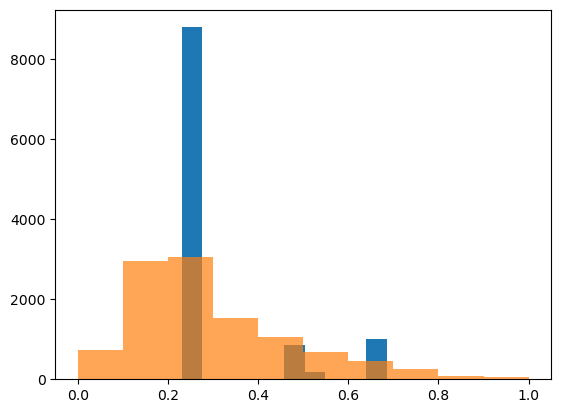

In [62]:
plt.hist(y_pred)
plt.hist(y, alpha=.7)